# Pandas Diamonds Plotting Case

Import pandas

In [3]:
import pandas as pd
%matplotlib inline

Load diamonds dataset from PDF. 

Check Wikipedia [article](https://en.wikipedia.org/wiki/Diamond_clarity) on information about diamond clarity.

In [4]:
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/' \
      'master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)

print(diamonds.shape)
print(diamonds.head())

(53940, 10)
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


## Histogram

A histogram is a univariate plot (a plot that displays one variable) that groups a numeric variable into bins and displays the number of observations that fall within each bin. A histogram is a useful tool for getting a sense  of the distribution of a numeric variable. Let's create a histogram of diamond carat weight with the `df.hist()` function.

*Carat* is a unit of mass equal to 200 mg and is used for measuring gemstones and pearls.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB74FE0CF8>]],
      dtype=object)

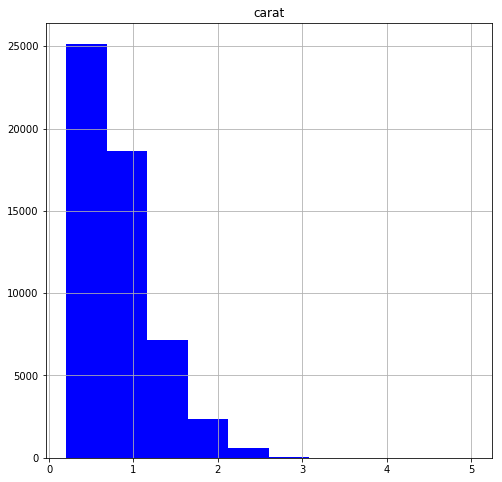

In [5]:
diamonds.hist(column="carat",        # Column to plot
              figsize=(8,8),         # Plot size
              color="blue")          # Plot color

The plot above has fairly wide bins and there doesn't appear to be any data beyond a carat size of 3.5. We can make try to get more out of hour histogram by adding some additional arguments to control the size of the bins and limits of the x-axis.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB7547CE80>]],
      dtype=object)

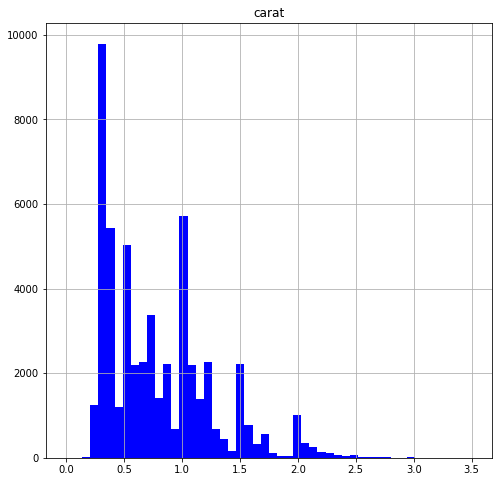

In [6]:
diamonds.hist(column="carat",        # Column to plot
              figsize=(8,8),         # Plot size
              color="blue",          # Plot color
              bins=50,               # Use 50 bins
              range= (0,3.5))        # Limit x-axis range

## Boxplots

Boxplots are another type of univariate plot for summarizing distributions of numeric data graphically.

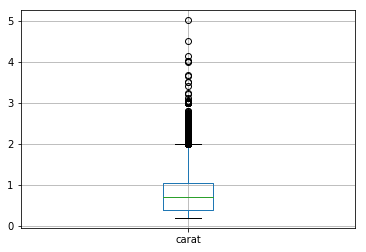

In [7]:
diamonds.boxplot(column="carat")

### Boxplots explained

A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data. The position of the whiskers is set by default to $1.5 \times IQR$ from the edges of the box, where $IQR$ is *Interquartile range*. *Outlier points* are those past the end of the whiskers.

*Interquartile range*  is a measure of statistical dispersion, being equal to the difference between upper and lower quartiles: $IQR = Q3 − Q1$

![](img/boxplot.png)

A boxplot displays distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

Here is an example of a boxplot that describes a data set generated from a normal probability distribution:

![](img/boxplot_normal_dist.png)

It is possible to adjust position of the whiskers by passing IQR multiplier direclty to matplotlib as `whis` parameter which is passed to matplotlib's function `matplotlib.pyplot.boxplot` (see documentation on [matplotlib.pyplot.boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)):

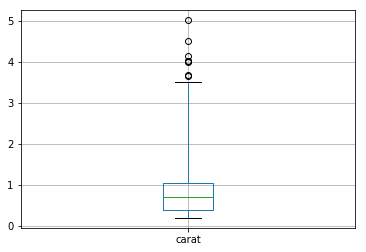

In [8]:
diamonds.boxplot(column="carat", whis=4)

## Side-by-side boxplots

One of the most useful features of a boxplot is the ability to make side-by-side boxplots. A side-by-side boxplot takes a numeric variable and splits it on based on some categorical variable, drawing a different boxplot for each level of the categorical variable. 

A side-by-side boxplot of diamond price split by diamond clarity

C:\Users\sefik\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


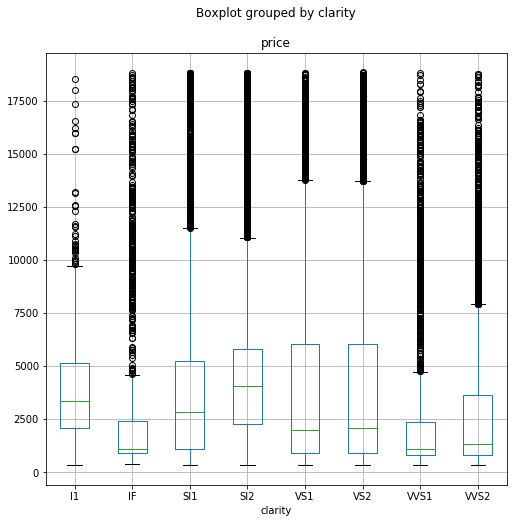

In [9]:
diamonds.boxplot(column="price",        # Column to plot
                 by= "clarity",         # Column to split upon
                 figsize= (8,8))        # Figure size

A side-by-side boxplot of diamond size split by size                  

C:\Users\sefik\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


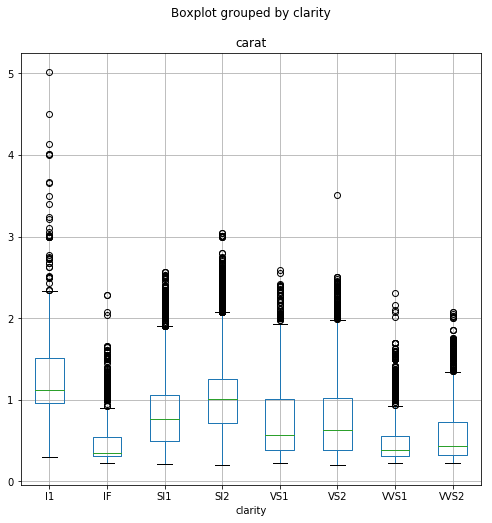

In [10]:
diamonds.boxplot(column="carat",        # Column to plot
                 by= "clarity",         # Column to split upon
                 figsize= (8,8))        # Figure size

## Barplot

Barplots are graphs that visually display counts of categorical variables.

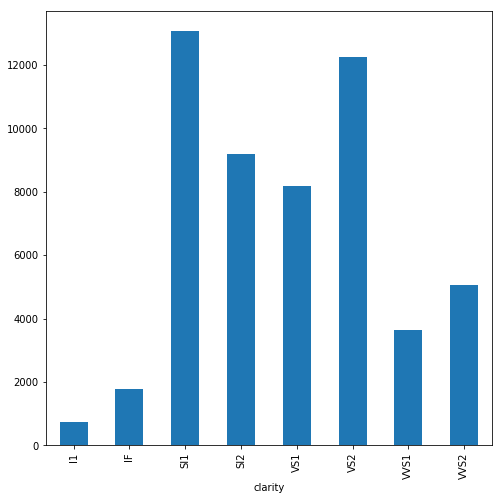

In [11]:
carat_table = diamonds.groupby(by="clarity").count()['carat']
carat_table.plot(kind="bar",
                 figsize=(8,8))

## Stacked barplot

Stacked barplots show the distribution of a second categorical variable within 
each bar

In [ ]:
carat_table = pd.crosstab(index=diamonds["clarity"], 
                          columns=diamonds["color"])
carat_table.plot(kind="bar",
                 figsize=(8,8),
                 stacked=True)

## Grouped barplot

A grouped barplot is an alternative to a stacked barplot that gives each 
stacked section its own bar. To make a grouped barplot, do not include the 
argument (or set `stacked=False`)

In [ ]:
carat_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

## Scatter plot

Scatter plot is a plot in which carat and price values are plotted along two axes, allowing to see a correlation between those two values.

In [ ]:
diamonds.plot(kind="scatter",     # Create a scatterplot
              x="carat",          # Put carat on the x axis
              y="price",          # Put price on the y axis
              figsize=(10,10),
              ylim=(0,20000))  

Saving plots to a file

In [ ]:
my_plot = diamonds.plot(kind="scatter",     # Create a scatterplot
                        x="carat",          # Put carat on the x axis
                        y="price",          # Put price on the y axis
                        figsize=(10,10),
                        ylim=(0,20000))  
my_fig = my_plot.get_figure()               # Get the figure
my_fig.savefig("scatterplot_example.png")  # Save to file